<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Face-Expression-Detection-Model-building" data-toc-modified-id="Face-Expression-Detection-Model-building-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Face Expression Detection Model building</a></span></li><li><span><a href="#Read-all-Images" data-toc-modified-id="Read-all-Images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read all Images</a></span></li><li><span><a href="#Make-Test-and-Train-split-in-images" data-toc-modified-id="Make-Test-and-Train-split-in-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Make Test and Train split in images</a></span></li><li><span><a href="#Read-Test-and-Train-Images" data-toc-modified-id="Read-Test-and-Train-Images-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Read Test and Train Images</a></span></li><li><span><a href="#Prepare-X_Test-and-X_Train" data-toc-modified-id="Prepare-X_Test-and-X_Train-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare X_Test and X_Train</a></span></li><li><span><a href="#Histogram-Transformation" data-toc-modified-id="Histogram-Transformation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Histogram Transformation</a></span></li><li><span><a href="#Create-a-function-to-use-hog-transformation-on-all-images" data-toc-modified-id="Create-a-function-to-use-hog-transformation-on-all-images-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create a function to use hog transformation on all images</a></span></li><li><span><a href="#Function-to-apply-HOG-and-Scaling" data-toc-modified-id="Function-to-apply-HOG-and-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Function to apply HOG and Scaling</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Prepare data</a></span></li><li><span><a href="#Find-various-options-available" data-toc-modified-id="Find-various-options-available-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Find various options available</a></span></li><li><span><a href="#Insights:" data-toc-modified-id="Insights:-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Insights:</a></span></li><li><span><a href="#Create-More-Images-by-Augumentation" data-toc-modified-id="Create-More-Images-by-Augumentation-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Create More Images by Augumentation</a></span></li><li><span><a href="#Initialising-the-ImageDataGenerator-class." data-toc-modified-id="Initialising-the-ImageDataGenerator-class.-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Initialising the ImageDataGenerator class.</a></span><ul class="toc-item"><li><span><a href="#Sample-after-Augumentation" data-toc-modified-id="Sample-after-Augumentation-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Sample after Augumentation</a></span></li></ul></li><li><span><a href="#Split-Test-and-Train-on-the-newly-generated-data" data-toc-modified-id="Split-Test-and-Train-on-the-newly-generated-data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Split Test and Train on the newly generated data</a></span></li><li><span><a href="#Read-images-and-their-names-into-df" data-toc-modified-id="Read-images-and-their-names-into-df-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Read images and their names into df</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Insights:" data-toc-modified-id="Insights:-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Insights:</a></span></li><li><span><a href="#CNN-Based-Model" data-toc-modified-id="CNN-Based-Model-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>CNN Based Model</a></span></li><li><span><a href="#Prepare-data-for-CNN" data-toc-modified-id="Prepare-data-for-CNN-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Prepare data for CNN</a></span></li><li><span><a href="#Check-F1_score" data-toc-modified-id="Check-F1_score-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Check F1_score</a></span></li><li><span><a href="#Insights:" data-toc-modified-id="Insights:-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Insights:</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Final Model</a></span><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-22.1"><span class="toc-item-num">22.1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Preprocessing-and-Label-Generation" data-toc-modified-id="Preprocessing-and-Label-Generation-22.2"><span class="toc-item-num">22.2&nbsp;&nbsp;</span>Preprocessing and Label Generation</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-22.3"><span class="toc-item-num">22.3&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-22.4"><span class="toc-item-num">22.4&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-22.5"><span class="toc-item-num">22.5&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></li><li><span><a href="#Final-Thoughts:" data-toc-modified-id="Final-Thoughts:-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Final Thoughts:</a></span></li></ul></div>

# Face Expression Detection Model building

In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import shutil
import skimage

from os import listdir
from matplotlib import image
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [2]:
def move_images(df, src, dest):
    '''
    This is to move the images from one folder to other 
    
    Used in context of moving all images to train and test sets
    '''
    for img in df['name'].values:
        shutil.copy(src + '\\' + img, dest + '\\' + img)


def get_expression(val):
    '''
    This Function is used to get the expression name mentioned in the image name
    
    Example:
        KA.NE1.26.tiff -> ExpressionName: NE
    '''
    return str(val)[str(val).find('.') + 1:str(val).find('.') + 3]


def get_expression_count(val):
    '''
    This Function is used to get the total number of expression name counts per person mentioned in the image name
    
    Example:
        KA.NE1.26.tiff -> Number of the respective expression: 1
    '''
    return str(val)[str(val).find('.') + 3:str(val).find('.') + 4]


def get_person_name(val):
    '''
    This Function is used to get the PersonName mentioned in the image name
    
    Example:
        KA.NE1.26.tiff -> PersonName: KA
    '''
    return str(val)[:str(val).find('.')]


def read_images(src_path):
    '''
    This function is used to read the images in the mentioned directory.
    
    Returns a list values of numpy arrays of the images and dataframe with image details from the name
    '''
    # load all images in a directory
    loaded_images = list()
    y = list()
    for filename in listdir(src_path):
        # load image
        img_data = image.imread(src_path + '\\' + filename)
        if (len(img_data.shape)) > 2:
            img_data = img_data[:, :, 0]
        # store loaded image
        loaded_images.append(img_data)
        y.append(filename)
    df = pd.DataFrame(y, columns=['name'])
    df['expression'] = df.applymap(lambda x: get_expression(x), )
    df['counter'] = df['name'].map(lambda x: get_expression_count(x), )
    df['person_name'] = df['name'].map(lambda x: get_person_name(x), )
    return loaded_images, df


def create_test_train(img_details_df,src_path,Train_path,Test_path,test_size_var):
    '''
    This function is used to read the images in the mentioned directory.
    
    Then will create temporary dataframes to group images based on the person
    
    Later we will use train_test_split from sklearn to shuffle the images
    
    Test size will be given as input to function as we have less images in source
    '''
    for person in img_details_df['person_name'].value_counts().keys():
        temp_df = img_details_df[img_details_df['person_name'] == person]
        X_temp = temp_df['name']
        y_temp = temp_df['expression']
        X_train, X_test, y_train, y_test = train_test_split(X_temp,
                                                            y_temp,
                                                            test_size=test_size_var,
                                                            stratify=y_temp,
                                                            random_state=2020,
                                                            shuffle=True)
        # Move images to respective folders
        for img_name in X_train:
            shutil.copy(src_path+ '\\' + img_name, Train_path+ '\\' + img_name)
        for img_name in X_test:
            shutil.copy(src_path+ '\\' + img_name, Test_path+ '\\' + img_name)

# Read all Images

In [3]:
# Read all the images and the names
source_images, img_details_df = read_images(r'C:\Users\samu0315\Downloads\Expression Data\Expression Data')

In [4]:
source_images[1].shape

(256, 256)

In [5]:
# label encode the target variable i.e., Expression
le = preprocessing.LabelEncoder()
img_details_df['expression']=le.fit_transform(img_details_df['expression'])

In [6]:
img_details_df

,name,expression,counter,person_name
0,KA.AN1.39.tiff,0,1,KA
1,KA.AN2.40.tiff,0,2,KA
2,KA.AN3.41.tiff,0,3,KA
3,KA.DI1.42.tiff,1,1,KA
4,KA.DI2.43.tiff,1,2,KA
...,...,...,...,...
208,YM.SA2.56.tiff,5,2,YM
209,YM.SA3.57.tiff,5,3,YM
210,YM.SU1.58.tiff,6,1,YM
211,YM.SU2.59.tiff,6,2,YM


#  Make Test and Train split in images

In [7]:
src_path = r'C:\Users\samu0315\Downloads\Expression Data\Expression Data'
Train_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Train_Images'
Test_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Test_Images'


# Create test and train images from the actual images 
# and we shall take 7 images per person with each expression in test set to get perfect evaluation
create_test_train(img_details_df,src_path,Train_path,Test_path,7)

# Read Test and Train Images


In [8]:
# Read the images from the source dirs for test and train

train_images, train_df = read_images(Train_path)
train_df['image'] = train_images

test_images, test_df = read_images(Test_path)
test_df['image'] = test_images

In [9]:
test_df

,name,expression,counter,person_name,image
0,KA.AN1.39.tiff,AN,1,KA,"[[105, 102, 108, 118, 114, 117, 113, 122, 113,..."
1,KA.DI3.44.tiff,DI,3,KA,"[[130, 128, 118, 125, 119, 123, 136, 136, 125,..."
2,KA.FE4.48.tiff,FE,4,KA,"[[85, 82, 95, 85, 77, 79, 87, 82, 88, 85, 96, ..."
3,KA.HA4.32.tiff,HA,4,KA,"[[103, 89, 98, 106, 112, 109, 114, 109, 115, 1..."
4,KA.NE1.26.tiff,NE,1,KA,"[[131, 135, 134, 137, 143, 148, 151, 149, 158,..."
...,...,...,...,...,...
65,YM.FE4.70.tiff,FE,4,YM,"[[108, 110, 106, 101, 116, 102, 103, 111, 108,..."
66,YM.HA1.52.tiff,HA,1,YM,"[[140, 150, 154, 150, 157, 150, 154, 153, 149,..."
67,YM.NE1.49.tiff,NE,1,YM,"[[103, 104, 105, 114, 113, 116, 123, 113, 126,..."
68,YM.SA1.55.tiff,SA,1,YM,"[[170, 156, 165, 167, 172, 171, 170, 175, 165,..."


# Prepare X_Test and X_Train

In [10]:
X_train=train_df['image']
y_train=pd.DataFrame(train_df['expression'])
y_train['expression']=le.fit_transform(y_train['expression'])

X_test=test_df['image']
y_test=pd.DataFrame(test_df['expression'])
y_test['expression']=le.fit_transform(y_test['expression'])

# Histogram Transformation

Histogram of Oriented Gradients
The Histogram of Oriented Gradient (HOG) feature descriptor is popular for object detection 


This is mainly used to reduce the feature space in image

More details on it here https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html

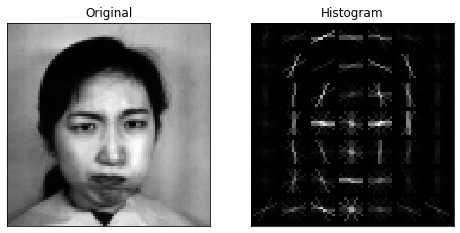

In [62]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

original = imread(
    r'C:\Users\samu0315\Downloads\Expression Data\Expression Data\KA.AN2.40.tiff',
    as_grey=True)

# scale down the image to one third
original = rescale(original, 1 / 3, mode='reflect')
# calculate the hog and return a visual representation.
original_hog, original_hog_img = hog(original,
                                     pixels_per_cell=(12, 12),
                                     cells_per_block=(2, 2),
                                     orientations=8,
                                     visualise=True,
                                     block_norm='L2-Hys')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 6)
# remove ticks and their labels
[
    a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax
]

ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(original_hog_img, cmap='gray')
ax[1].set_title('Histogram')
plt.show()

# Create a function to use hog transformation on all images

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

# Function to apply HOG and Scaling

In [13]:
def normalize_train_data(X):
    # create an instance of each transformer
    hogify = HogTransformer(
        pixels_per_cell=(8, 8),
        cells_per_block=(2,2),
        orientations=9,
        block_norm='L2-Hys'
    )
    scalify = StandardScaler()

    # call fit_transform on each transform converting X_train step by step
    X_hog = hogify.fit_transform(X)
    X_prepared = scalify.fit_transform(X_hog)
    X_prepared = pd.DataFrame(X_prepared)
    print(X_prepared.shape)
    return X_prepared

# Prepare data

In [14]:
X_train_prepared = normalize_train_data(X_train)

(143, 34596)


In [15]:
X_test_prepared = normalize_train_data(X_test)

(70, 34596)


# Find various options available

In [16]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_prepared, X_test_prepared, y_train, y_test)
models

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [08:56<00:00, 17.89s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.94,0.94,None,0.94,4.76
RidgeClassifierCV,0.94,0.94,None,0.94,0.66
RidgeClassifier,0.94,0.94,None,0.94,0.64
PassiveAggressiveClassifier,0.91,0.91,None,0.91,3.90
Perceptron,0.90,0.90,None,0.90,1.49
LinearSVC,0.89,0.89,None,0.88,5.09
SGDClassifier,0.89,0.89,None,0.88,1.36
NuSVC,0.89,0.89,None,0.89,2.39
ExtraTreesClassifier,0.81,0.81,None,0.81,1.21


# Insights:


The results are promising, however these images are very good portraits, and in real world when we try to predict the expression, these kind of images are rare, The most common ones are from video streams and they will be distorted, rotated, zoomed in / zoomed out etc etc....


So lets create our own images from these and make them as inputs, to models and check the performance. 


Keras has inbuilt libraries which will perfrom this task and its called ImageDataGenerator

We will make 11 copies from one image and then divide them into test and train images

# Create More Images by Augumentation

In [31]:
original_data_path = r'C:\Users\samu0315\Downloads\Expression Data\Expression Data'
aug_data_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\New_trian_data'

# Initialising the ImageDataGenerator class.

In [32]:
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(rotation_range=40,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             brightness_range=(0.5, 1.5))

for filename in listdir(original_data_path):
    shutil.copy(original_data_path+ '\\' + filename, aug_data_path+ '\\' + filename)
    img = load_img(original_data_path + '\\' + filename)
    # Converting the input sample image to an array
    x = img_to_array(img)
    # Reshaping the input image
    x = x.reshape((1, ) + x.shape)
    # Generating and saving 11 augmented samples
    # using the above defined parameters.
    i = 0
    for batch in datagen.flow(
            x,
            batch_size=1,
            save_to_dir=aug_data_path,
            save_prefix=filename,
            save_format='tiff'):
        i += 1
        if i > 10:
            break

## Sample after Augumentation

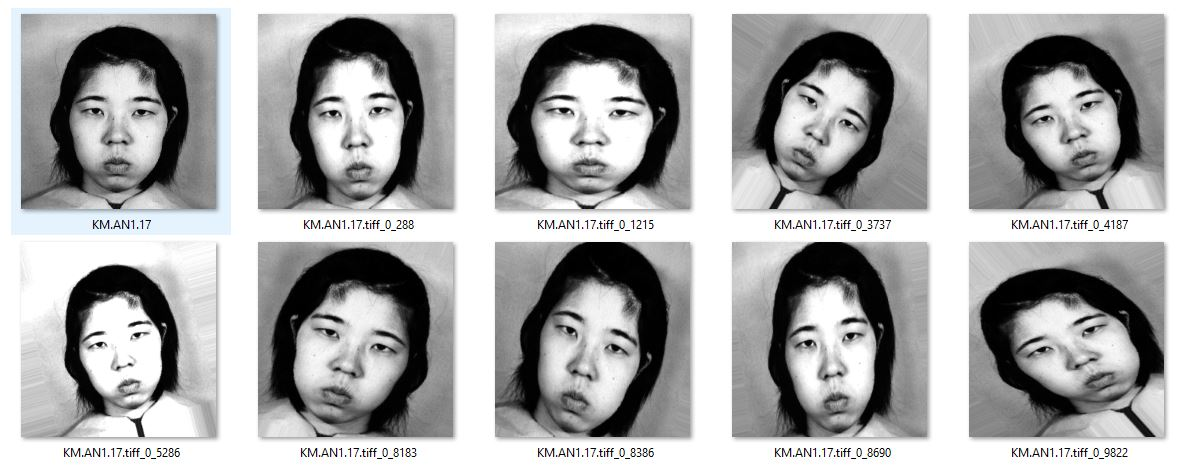

# Split Test and Train on the newly generated data

In [33]:
src_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\New_trian_data'
Train_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Train_Images'
Test_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Test_Images'

source_images, img_details_df = read_images(src_path)
create_test_train(img_details_df,src_path,Train_path,Test_path,.2)

# Read images and their names into df

In [34]:
train_images, train_df = read_images(Train_path)
train_df['image'] = train_images

test_images, test_df = read_images(Test_path)
test_df['image'] = test_images

# Prepare Data

In [35]:
X_train=train_df['image']
X_train_prepared = normalize_train_data(X_train)

y_train=pd.DataFrame(train_df['expression'])
y_train['expression']=le.fit_transform(y_train['expression'])

X_test=test_df['image']
X_test_prepared = normalize_train_data(X_test)

y_test=pd.DataFrame(test_df['expression'])
y_test['expression']=le.fit_transform(y_test['expression'])

(2041, 34596)
(515, 34596)


for intrest of time lets just check the top 3 performers in our previous test

If we use lazy classfier it takes 6+ hours to train and i did a restart with clear output :) :) 

So, lets just evaluate top 3 performers


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(random_state=0).fit(X_train_prepared, y_train)

y_pred = clf.predict(X_test_prepared)

print('LogisticRegression: '+str(f1_score(y_test, y_pred, average='macro')))

LogisticRegression: 0.5782575950455948


In [38]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import f1_score

clf = RidgeClassifierCV().fit(X_train_prepared, y_train)

y_pred = clf.predict(X_test_prepared)

print('RidgeClassifierCV: ')
print(f1_score(y_test, y_pred, average='macro'))

RidgeClassifierCV: 
0.5592016336950068


In [39]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

clf = RidgeClassifier().fit(X_train_prepared, y_train)

y_pred = clf.predict(X_test_prepared)

print('RidgeClassifier: ')
print(f1_score(y_test, y_pred, average='macro'))

RidgeClassifier: 
0.5592016336950068


# Insights:

Well as expected, with change in training data from portraits to distorted images, the scores fell from 94% to 57% 

These are vanila variants of the models, we can try to improve the scores by tuning 

We can use `GridSearchCV`, `RandomSearchCV` or even `Hyperopt`.

Lets also try at on `CNN Model` and check if it looks promising

# CNN Based Model

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [41]:
def plot_training_history(history, model, eval_images=False):
    '''
    Function to plot the train vs test of loss and acc
    '''
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [42]:
# Sequential model from keras
model = Sequential()

# add model layers. The first parameter is the number of filters to make at each layer.
# Meaning here the result of the first layer is 64 different "feature maps" or "activation maps"
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(256, 256,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

# Lets use adam optimiser and categorical loss as we have multi label
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare data for CNN 

In [43]:
train_images_np = np.asarray(train_images)
train_images_np.shape

(2041, 256, 256)

In [44]:
train_images_np=train_images_np.reshape(2041, 256, 256,1)

In [45]:
test_images_np = np.asarray(test_images)
test_images_np.shape

(515, 256, 256)

In [46]:
test_images_np=test_images_np.reshape(515, 256, 256,1)

In [47]:
y_train = y_train['expression']
y_train.shape

(2041,)

In [48]:
y_test = y_test['expression']
y_test.shape

(515,)

In [49]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


Train on 2041 samples, validate on 515 samples
Epoch 1/2
2041/2041 [==============================] - 541s 265ms/sample - loss: 1.9447 - accuracy: 0.1720 - val_loss: 1.9460 - val_accuracy: 0.1417
Epoch 2/2
2041/2041 [==============================] - 499s 245ms/sample - loss: 1.9395 - accuracy: 0.2244 - val_loss: 1.9456 - val_accuracy: 0.1262


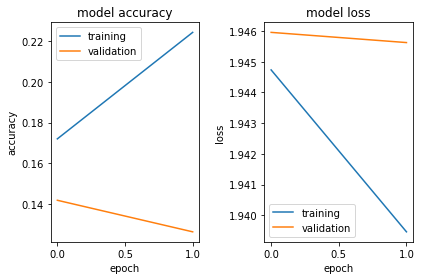

NameError: name 'test_data' is not defined

In [51]:
# Previously, we flattened our training data, but now we INTEND on having 2D input data.
# training_images => 256 x 256 matrix
# Plus one small caveat: we have to indicate the number of color channels explicitly as a dimension...
history = model.fit(
    x=train_images_np,
    y=y_train,
    validation_data=(test_images_np, y_test),
#     batch_size=128,
    epochs=2,
    verbose=True,
)
plot_training_history(history, model, eval_images=False)

# Check F1_score

In [60]:
y_test=pd.DataFrame(test_df['expression'])
y_test['expression']=le.fit_transform(y_test['expression'])
y_test = y_test['expression']

y_pred = model.predict_classes(test_images_np)

print('CNN_Model: ')
print(f1_score(y_test, y_pred, average='macro'))


CNN_Model: 
0.10178922670858633


# Insights:

Although the results are unsatisfactory for the CNN model, there is a lot of room for improvement.

Neural Networks require lot of training and even more time on hyper parameter tuning.

We can make use of library like `TALOS` or `Keras-Tuner` for those tasks.

But given the time limit and the task at hand, I would like to prefer to have `RidgeClassfierCV` model with original images without augumentation (we were not told anything about the usage of model and hence the assumption, we will work only on portrait images)

# Final Model
## Data Loading
## Preprocessing and Label Generation
## Train/Test Split

In [63]:
# Read all the images and the names
source_images, img_details_df = read_images(r'C:\Users\samu0315\Downloads\Expression Data\Expression Data')

# label encode the target variable i.e., Expression
le = preprocessing.LabelEncoder()
img_details_df['expression']=le.fit_transform(img_details_df['expression'])

#  Make Test and Train split in images

src_path = r'C:\Users\samu0315\Downloads\Expression Data\Expression Data'
Train_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Train_Images'
Test_path = r'C:\Users\samu0315\Desktop\Mine\Personal\gl_aiml\interview\Interview for tuple\Test_Images'


# Create test and train images from the actual images 
# and we shall take 7 images per person with each expression in test set to get perfect evaluation
create_test_train(img_details_df,src_path,Train_path,Test_path,7)

# Read the images from the source dirs for test and train

train_images, train_df = read_images(Train_path)
train_df['image'] = train_images

test_images, test_df = read_images(Test_path)
test_df['image'] = test_images

# Prepare X_Test and X_Train

X_train=train_df['image']
y_train=pd.DataFrame(train_df['expression'])
y_train['expression']=le.fit_transform(y_train['expression'])

X_test=test_df['image']
y_test=pd.DataFrame(test_df['expression'])
y_test['expression']=le.fit_transform(y_test['expression'])

X_train_prepared = normalize_train_data(X_train)

X_test_prepared = normalize_train_data(X_test)

(143, 34596)
(70, 34596)


## Model Training
## Model Evaluation

In [65]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import f1_score

clf = RidgeClassifierCV(cv = 5).fit(X_train_prepared, y_train)

y_pred = clf.predict(X_test_prepared)

print('RidgeClassifierCV: f1_score is ')
print(f1_score(y_test, y_pred, average='macro'))

RidgeClassifierCV: f1_score is 
0.9431153641679958


In [66]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.80      0.89        10
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       0.83      1.00      0.91        10

    accuracy                           0.94        70
   macro avg       0.95      0.94      0.94        70
weighted avg       0.95      0.94      0.94        70



# Final Thoughts:

1. Simple models are always preferred in Industry as the training is simple and easy to maintain.
2. Deep Learning models are better when normal ML models are not working as per expectation.
3. Prediction time is also very important and in this case simple models always beat Deep Learning models.
4. Deep Learning is complex but will yeild very good results if given ample time and large data volumes.

This task is aimed to building a model to get better performing model on a dataset with portrait images and on this, linear models work very well than deep learning models and boosting models with trees.